## Intro To Probability - Toy Model

In [1]:
# Importing packages
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations and pandas tables in cells output
from IPython.core.display import display, HTML, Latex

## Setting style (not relevant in Colab)
display(HTML('<link rel="stylesheet" href="../../../css/style.css">'))  ## Use the same style as the rest of the site (mostly for titiles)
display(HTML("<style>.output_png { display: table-cell; text-align: center; vertical-align: middle; }</style>"))  ## Center output figures

### Toy Model: The 🍕 Pizza & Pancakes 🥞 Drive-Thru

| $$X$$ 🍕 \ $$Y$$ 🥞 |  0   |  1   |  2   |  3   |
| ------------------- | ---- | ---- | ---- | ---- |
|          0          | 0    | 0.15 | 0.2  | 0.05 |
|          1          | 0.08 | 0.03 | ???  | 0.04 |
|          2          | 0.02 | 0.03 | 0.04 | 0.01 |
|          3          | 0.1  | 0.05 | 0.05 | 0.1  |

In [2]:
## P_{X,Y} joint distribution
## --------------------------
x_values = y_values = np.array([0, 1, 2, 3])
p_xy = pd.DataFrame([[0   , 0.15, 0.2   , 0.05],
                     [0.08, 0.03, np.nan, 0.04],
                     [0.02, 0.03, 0.04  , 0.01],
                     [0.1 , 0.05, 0.05  , 0.1 ]],
                     index=[0, 1, 2, 3],
                     columns=[0, 1, 2, 3])
display(HTML(p_xy.to_html()))

,0,1,2,3
0,0.00,0.15,0.20,0.05
1,0.08,0.03,NaN,0.04
2,0.02,0.03,0.04,0.01
3,0.10,0.05,0.05,0.10


#### Ex. 1.2a

Calcualting $p_{X,Y}\left(1,2\right)$

In [3]:
p_xy.loc[1, 2] = 1 - np.nansum(p_xy)
display(
    Latex(r'$p_{{X,Y}}\left(1,2\right)={:.3}$'.format(p_xy.loc[1, 2])),
    Latex(r'$p_{{X,Y}}$:'),
    HTML(p_xy.to_html()),
    )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

,0,1,2,3
0,0.00,0.15,0.20,0.05
1,0.08,0.03,0.05,0.04
2,0.02,0.03,0.04,0.01
3,0.10,0.05,0.05,0.10


#### Ex 1.2b
Calculating $p_{X\lvert Y}\left(1\lvert Y=0\right)$

In [4]:
p_x_given_y_1_0 = p_xy.loc[1, 0] / p_xy.loc[:, 0].sum()
display(Latex(r'$p_{{X\lvert Y}}\left(1\lvert Y=0\right)={:.3}$'.format(p_x_given_y_1_0)))

<IPython.core.display.Latex object>

#### Ex 1.2c

Calcualting $p_X\left(x\right)$

In [5]:
p_x = p_xy.sum(axis=1)
display(
    Latex(r'$p_{{X}}\left(x\right)$:'),
    HTML(p_x.to_frame().to_html())
    )

<IPython.core.display.Latex object>

,0
0,0.4
1,0.2
2,0.1
3,0.3


Calculating $Pr\left(X_1+X_2=3\right)$

In [6]:
prob3 = np.sum([p_x[x1] * p_x[3 - x1] for x1 in range(4)])
display(Latex(r'$Pr\left(X_1+X_2=3\right)={:.3}$'.format(prob3)))

<IPython.core.display.Latex object>

#### Ex 1.3

In [7]:
## Import the normal distribution model from SciPy
from scipy.stats import norm

length_grid = np.arange(3.5, 5.3, 0.01)
sigma = 0.2
p_l_given_x = [norm(4 + 0.2 * x, sigma) for x in p_x.index]

##### Plotting

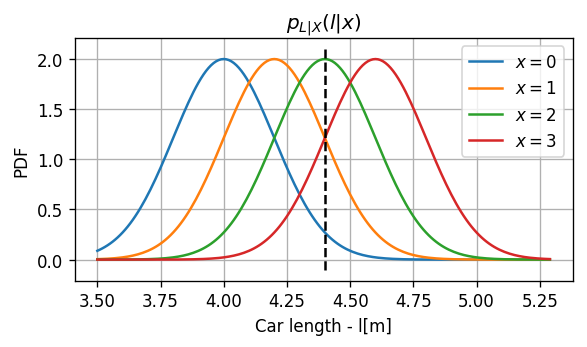

In [8]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title(r'$p_{L|X}\left(l|x\right)$')
for x in p_x.index:
    ax.plot(length_grid, p_l_given_x[x].pdf(length_grid), label='$x={}$'.format(x));
ax.plot([4.4, 4.4], ax.get_ylim(), '--k')
ax.set_xlabel('Car length - l[m]')
ax.set_ylabel('PDF')
ax.legend()
plt.tight_layout()

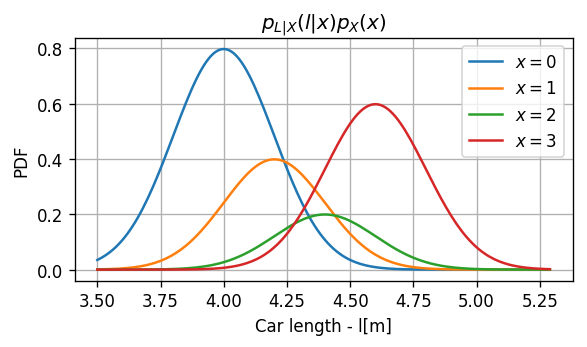

In [9]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title(r'$p_{L|X}\left(l|x\right)p_X\left(x\right)$')
for x in  p_x.index:
    ax.plot(length_grid, p_l_given_x[x].pdf(length_grid) * p_x[x], label='$x={}$'.format(x));
ax.set_xlabel('Car length - l[m]')
ax.set_ylabel('PDF')
ax.legend()
plt.tight_layout()

Calculating:

$p_{X,L}\left(x,4.4\right)=p_{L|X}\left(4.4|x\right)p_X\left(x\right)$

In [10]:
pd.Series([p_l_given_x[x].pdf(4.4) for x in p_x.index], index=p_x.index)

0    0.269955
1    1.209854
2    1.994711
3    1.209854
dtype: float64

In [11]:
p_x_l0 = pd.Series([p_l_given_x[x].pdf(4.4) for x in p_x.index], index=p_x.index) * p_x
display(Latex(r'$p_{{X|L}}\left(x,0.44\right)$:'))
display(HTML(p_x_l0.to_frame().to_html()))

<IPython.core.display.Latex object>

,0
0,0.107982
1,0.241971
2,0.199471
3,0.362956


Calculating:

$p_{X|L}\left(x|L=4.4\right)$

In [12]:
px_given_l0 = p_x_l0 / p_x_l0.sum()
display(Latex(r'$p_{X|L}\left(x|L=4.4\right)$:'))
display(HTML(px_given_l0.to_frame().to_html()))

<IPython.core.display.Latex object>

,0
0,0.118352
1,0.265208
2,0.218627
3,0.397812


#### Ex 1.3

Calcualting $\mathbb{E}\left[X|L=4.4\right]$

In [13]:
x_hat_l2 = (px_given_l0 * p_x.index).sum()
display(Latex(r'$\hat{{x}}^*_\left(l_2\right)={:.4}$'.format(x_hat_l2)))

<IPython.core.display.Latex object>

#### Extra

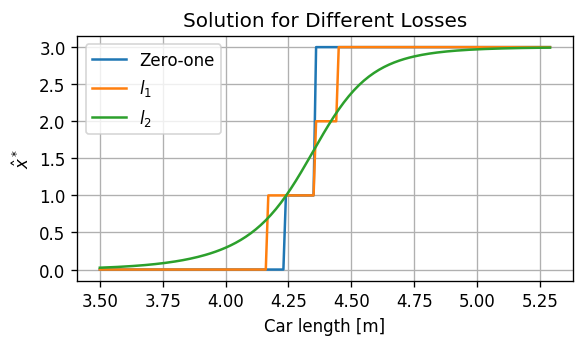

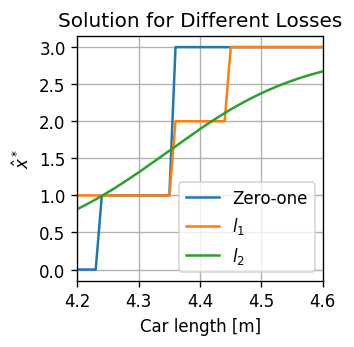

In [14]:
p_xl = np.array([p_l_given_x[x].pdf(length_grid) * p_x[x] for x in p_x.index])
p_x_given_l = p_xl / p_xl.sum(axis=0, keepdims=True)

fig, ax = plt.subplots(figsize=(5, 3))
ax.set_title('Solution for Different Losses')

ax.plot(length_grid, p_x_given_l.argmax(axis=0), label='Zero-one');
ax.plot(length_grid, (p_x_given_l.cumsum(axis=0) > 0.5).argmax(axis=0), label='$l_1$');
ax.plot(length_grid, (p_x.index.values[:, None] * p_x_given_l).sum(axis=0), label='$l_2$');

ax.set_xlabel('Car length [m]')
ax.set_ylabel('$\hat{x}^*$')
ax.legend()
plt.tight_layout()

fig, ax = plt.subplots(figsize=(3, 3))
ax.set_title('Solution for Different Losses')

ax.plot(length_grid, p_x_given_l.argmax(axis=0), label='Zero-one');
ax.plot(length_grid, (p_x_given_l.cumsum(axis=0) > 0.5).argmax(axis=0), label='$l_1$');
ax.plot(length_grid, (p_x.index.values[:, None] * p_x_given_l).sum(axis=0), label='$l_2$');

ax.set_xlabel('Car length [m]')
ax.set_ylabel('$\hat{x}^*$')
ax.set_xlim(4.2, 4.6)
ax.legend()
plt.tight_layout()

In [19]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

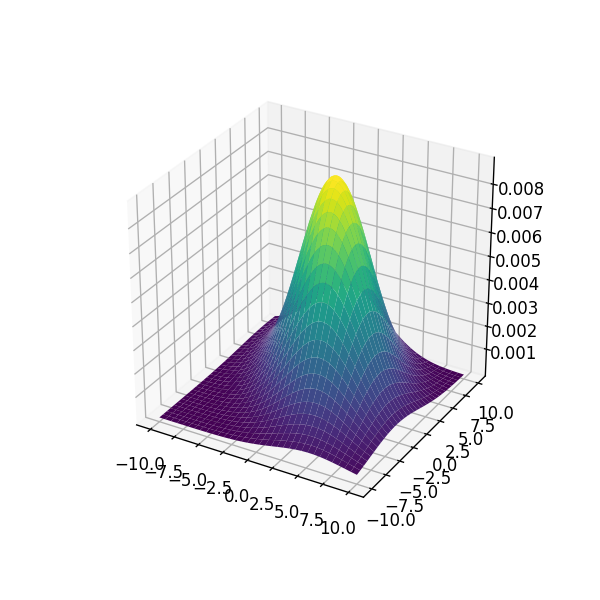

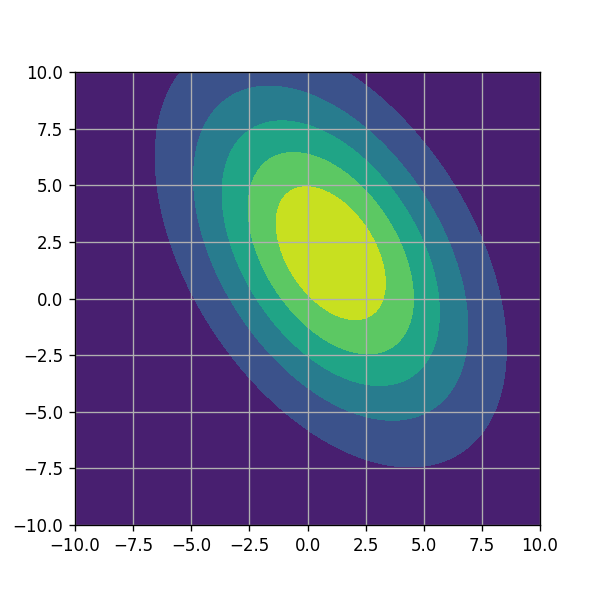

In [38]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

dist = multivariate_normal(mean=[1, 2], cov=[[16, -9], [-9, 25]])
xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
pdf = dist.pdf(np.stack((xx, yy), axis=2))

fig = plt.figure(figsize=(5, 5))
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, pdf, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=plt.cm.viridis);

fig, ax = plt.subplots(figsize=(5, 5))
cset = ax.contourf(xx, yy, pdf, cmap=plt.cm.viridis)

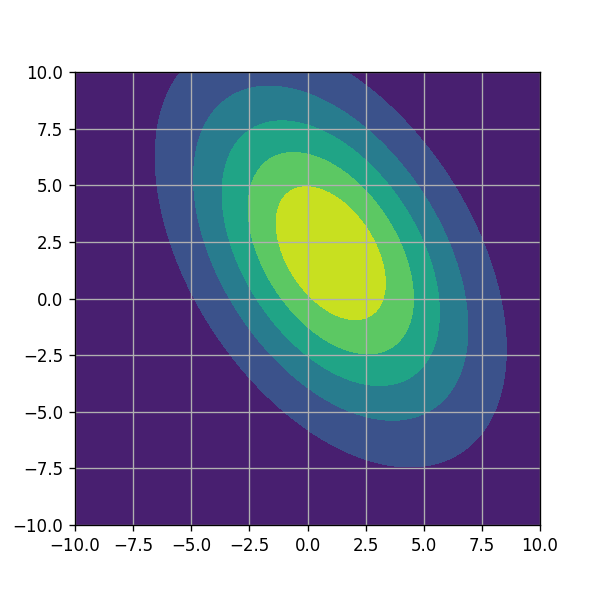